<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.839124,91.194922,-0.016175,153.017871,153.037623,-0.019752
1,0.0,1.0,27.574247,64.441475,-0.021129,101.994593,102.016165,-0.021572
2,0.0,2.0,32.395087,67.737688,0.011972,110.144748,110.133625,0.011123
3,0.0,3.0,88.510700,60.538365,0.024148,159.073213,159.049754,0.023459
4,0.0,4.0,61.421552,63.672799,-0.030353,135.063998,135.095082,-0.031084
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.305935,31.531126,0.043904,69.880965,69.835927,0.045038
119996,999.0,116.0,58.469893,48.816975,-0.000200,117.286668,117.288997,-0.002329
119997,999.0,117.0,42.453628,77.408777,-0.009547,129.852859,129.862269,-0.009410
119998,999.0,118.0,85.542884,23.061880,-0.003975,118.600788,118.610404,-0.009616


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    51.839124  91.194922 -0.016175  153.017871  153.037623 -0.019752
      1.0    27.574247  64.441475 -0.021129  101.994593  102.016165 -0.021572
      2.0    32.395087  67.737688  0.011972  110.144748  110.133625  0.011123
      3.0    88.510700  60.538365  0.024148  159.073213  159.049754  0.023459
      4.0    61.421552  63.672799 -0.030353  135.063998  135.095082 -0.031084
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.305935  31.531126  0.043904   69.880965   69.835927  0.045038
      116.0  58.469893  48.816975 -0.000200  117.286668  117.288997 -0.002329
      117.0  42.453628  77.408777 -0.009547  129.852859  129.862269 -0.009410
      118.0  85.542884  23.061880 -0.003975  118.600788  118.610404 -0.009616
      119.0  34.890937  30.920671  0.007189   75.818797   75.811248  0.007549

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    51.839124  91.194922 -0.016175  153.017871  153.037623 -0.019752
      1.0    27.574247  64.441475 -0.021129  101.994593  102.016165 -0.021572
      2.0    32.395087  67.737688  0.011972  110.144748  110.133625  0.011123
      3.0    88.510700  60.538365  0.024148  159.073213  159.049754  0.023459
      4.0    61.421552  63.672799 -0.030353  135.063998  135.095082 -0.031084
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.305935  31.531126  0.043904   69.880965   69.835927  0.045038
      116.0  58.469893  48.816975 -0.000200  117.286668  117.288997 -0.002329
      117.0  42.453628  77.408777 -0.009547  129.852859  129.862269 -0.009410
      118.0  85.542884  23.061880 -0.003975  118.600788  118.610404 -0.009616
      119.0  34.890937  30.920671  0.007189   75.818797   75.811248  0.007549

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.839124,91.194922,-0.016175,153.017871,153.037623,-0.019752
1,0.0,1.0,27.574247,64.441475,-0.021129,101.994593,102.016165,-0.021572
2,0.0,2.0,32.395087,67.737688,0.011972,110.144748,110.133625,0.011123
3,0.0,3.0,88.510700,60.538365,0.024148,159.073213,159.049754,0.023459
4,0.0,4.0,61.421552,63.672799,-0.030353,135.063998,135.095082,-0.031084
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.305935,31.531126,0.043904,69.880965,69.835927,0.045038
119996,999.0,116.0,58.469893,48.816975,-0.000200,117.286668,117.288997,-0.002329
119997,999.0,117.0,42.453628,77.408777,-0.009547,129.852859,129.862269,-0.009410
119998,999.0,118.0,85.542884,23.061880,-0.003975,118.600788,118.610404,-0.009616


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    51.839124  91.194922 -0.016175  153.017871  153.037623 -0.019752
      1.0    27.574247  64.441475 -0.021129  101.994593  102.016165 -0.021572
      2.0    32.395087  67.737688  0.011972  110.144748  110.133625  0.011123
      3.0    88.510700  60.538365  0.024148  159.073213  159.049754  0.023459
      4.0    61.421552  63.672799 -0.030353  135.063998  135.095082 -0.031084
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.305935  31.531126  0.043904   69.880965   69.835927  0.045038
      116.0  58.469893  48.816975 -0.000200  117.286668  117.288997 -0.002329
      117.0  42.453628  77.408777 -0.009547  129.852859  129.862269 -0.009410
      118.0  85.542884  23.061880 -0.003975  118.600788  118.610404 -0.009616
      119.0  34.890937  30.920671  0.007189   75.818797   75.811248  0.007549

[120000 rows x 6 columns]

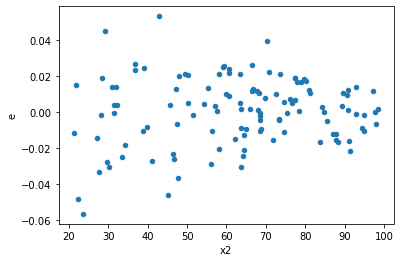

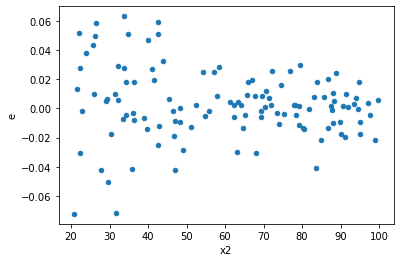

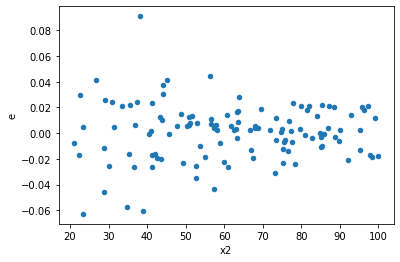

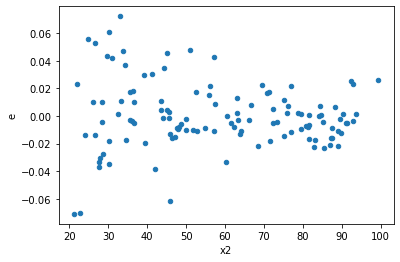

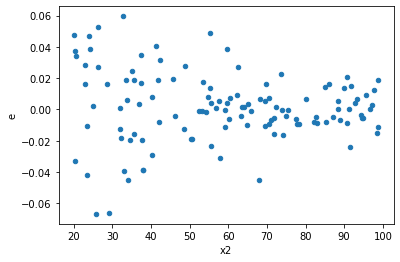

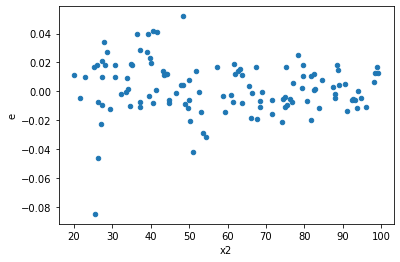

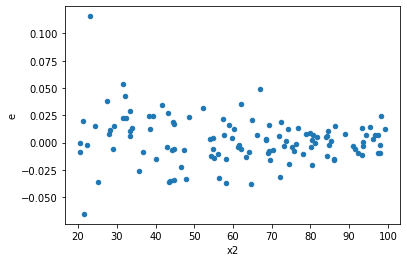

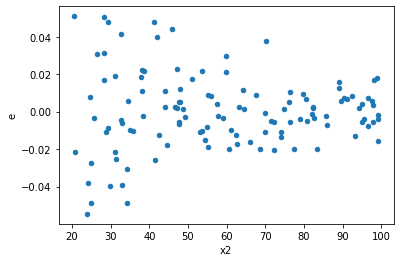

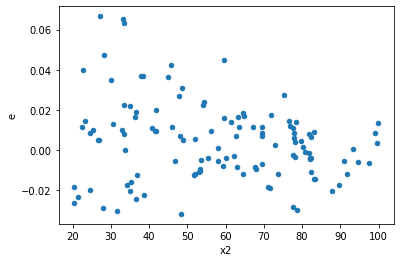

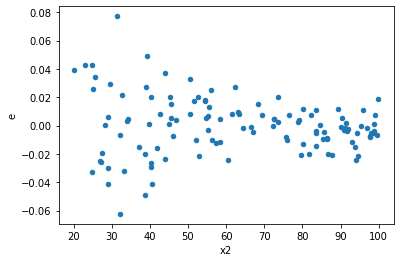

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,57.0,59.0,0.021971671338418867,0.033488831977851824,0.00038546791821787485,0.0005676073216585055,1.472515077993291,0.14275848832193772,0.9286207558390311,0.07137924416096886,Reject001=1 : Homoscedasticity
3.0,60.0,56.0,0.032825776134708926,0.03352127960292236,0.0005470962689118154,0.0005985942786236136,1.0941297037434174,0.7356518899469868,0.6321740550265066,0.3678259449734934,Reject001=1 : Homoscedasticity
4.0,60.0,56.0,0.009334366859176877,0.048595841590775395,0.0001555727809862813,0.0008677828855495606,5.577986586394463,9.688125857110208e-10,0.9999999995155937,4.844062928555104e-10,Reject001=0 : Heteroscedasticity
5.0,52.0,64.0,0.009500962002732106,0.02889942543732794,0.00018271080774484818,0.00045155352245824907,2.4714111224817863,0.000633101317882856,0.9996834493410586,0.000316550658941428,Reject001=0 : Heteroscedasticity
6.0,69.0,47.0,0.015056426283718661,0.03708661239170901,0.00021820907657563277,0.0007890768593980641,3.616150490992819,8.357433385119961e-06,0.9999958212833074,4.1787166925599806e-06,Reject001=0 : Heteroscedasticity
12.0,56.0,60.0,0.01910205033116446,0.04219637799961164,0.0003411080416279368,0.000703272966660194,2.0617308325650328,0.006395122672656628,0.9968024386636717,0.003197561336328314,Reject001=0 : Heteroscedasticity
13.0,45.0,71.0,0.014767716217147552,0.038948997758799904,0.00032817147149216783,0.0005485774332225339,1.671618287623232,0.05176420206294052,0.9741178989685297,0.02588210103147026,Reject001=1 : Homoscedasticity
15.0,60.0,56.0,0.03970457061470525,0.03852841544513902,0.0006617428435784208,0.0006880074186631968,1.0396900024528388,0.8851674441942687,0.5574162779028656,0.44258372209713437,Reject001=1 : Homoscedasticity
17.0,66.0,50.0,0.009401447393643684,0.03324054333633498,0.0001424461726309649,0.0006648108667266996,4.667102347839307,8.489455360916054e-08,0.9999999575527232,4.244727680458027e-08,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,56.0,0.021201773274604308,0.01900100809548549,0.0003533628879100718,0.0003393037159908123,0.9602132187609994,0.8753223685516421,Reject001=1 : Homoscedasticity
1.0,54.0,62.0,0.05416596005979559,0.012538759986424378,0.0010030733344406591,0.00020223806429716737,0.20161842345249942,1.363592665843677e-08,Reject001=0 : Heteroscedasticity
2.0,57.0,59.0,0.021971671338418867,0.033488831977851824,0.00038546791821787485,0.0005676073216585055,1.472515077993291,0.14275848832193772,Reject001=1 : Homoscedasticity
3.0,60.0,56.0,0.032825776134708926,0.03352127960292236,0.0005470962689118154,0.0005985942786236136,1.0941297037434174,0.7356518899469868,Reject001=1 : Homoscedasticity
4.0,60.0,56.0,0.009334366859176877,0.048595841590775395,0.0001555727809862813,0.0008677828855495606,5.577986586394463,9.688125857110208e-10,Reject001=0 : Heteroscedasticity
5.0,52.0,64.0,0.009500962002732106,0.02889942543732794,0.00018271080774484818,0.00045155352245824907,2.4714111224817863,0.000633101317882856,Reject001=0 : Heteroscedasticity
6.0,69.0,47.0,0.015056426283718661,0.03708661239170901,0.00021820907657563277,0.0007890768593980641,3.616150490992819,8.357433385119961e-06,Reject001=0 : Heteroscedasticity
7.0,73.0,43.0,0.04064125814274453,0.003652581611783178,0.0005567295635992401,8.494375841356229e-05,0.15257633861655093,2.893600320941915e-12,Reject001=0 : Heteroscedasticity
8.0,49.0,67.0,0.031872143660377814,0.010224475074562464,0.0006504519114362819,0.00015260410559048455,0.2346124331520757,4.688493475590671e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    606
Reject001=1 : Homoscedasticity      394
Name: Result_test, dtype: int64